# Project Title: Credit Card Fraud Detection

**Dataset**: Kaggle – creditcard.csv

**Techniques**: EDA, Feature Engineering (Hour, Log Amount), SMOTE, Random Forest, XGBoost, Anomaly Detection (IsolationForest, LOF), SHAP Explainability

**Evaluation**: PR-AUC = 0.99, ROC-AUC = 0.995

**Model Persistence** : joblib dump → fraud_xgb_model.pkl

**Notes**: Threshold tuning, false positives analysis, explainability plots

**1. Load dataset**

In [3]:
from google.colab import files

# 1. Upload kaggle.json
files.upload()

# 2. Move kaggle.json to ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 3. Download Mall Customers dataset from Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

# 4. Unzip into a folder
!unzip creditcardfraud.zip -d creditcardfraud


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.22GB/s]
Archive:  creditcardfraud.zip
  inflating: creditcardfraud/creditcard.csv  


2.**EDA**

In [3]:
import pandas as pd
df = pd.read_csv('creditcardfraud/creditcard.csv')
print(df.columns)
print(df.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


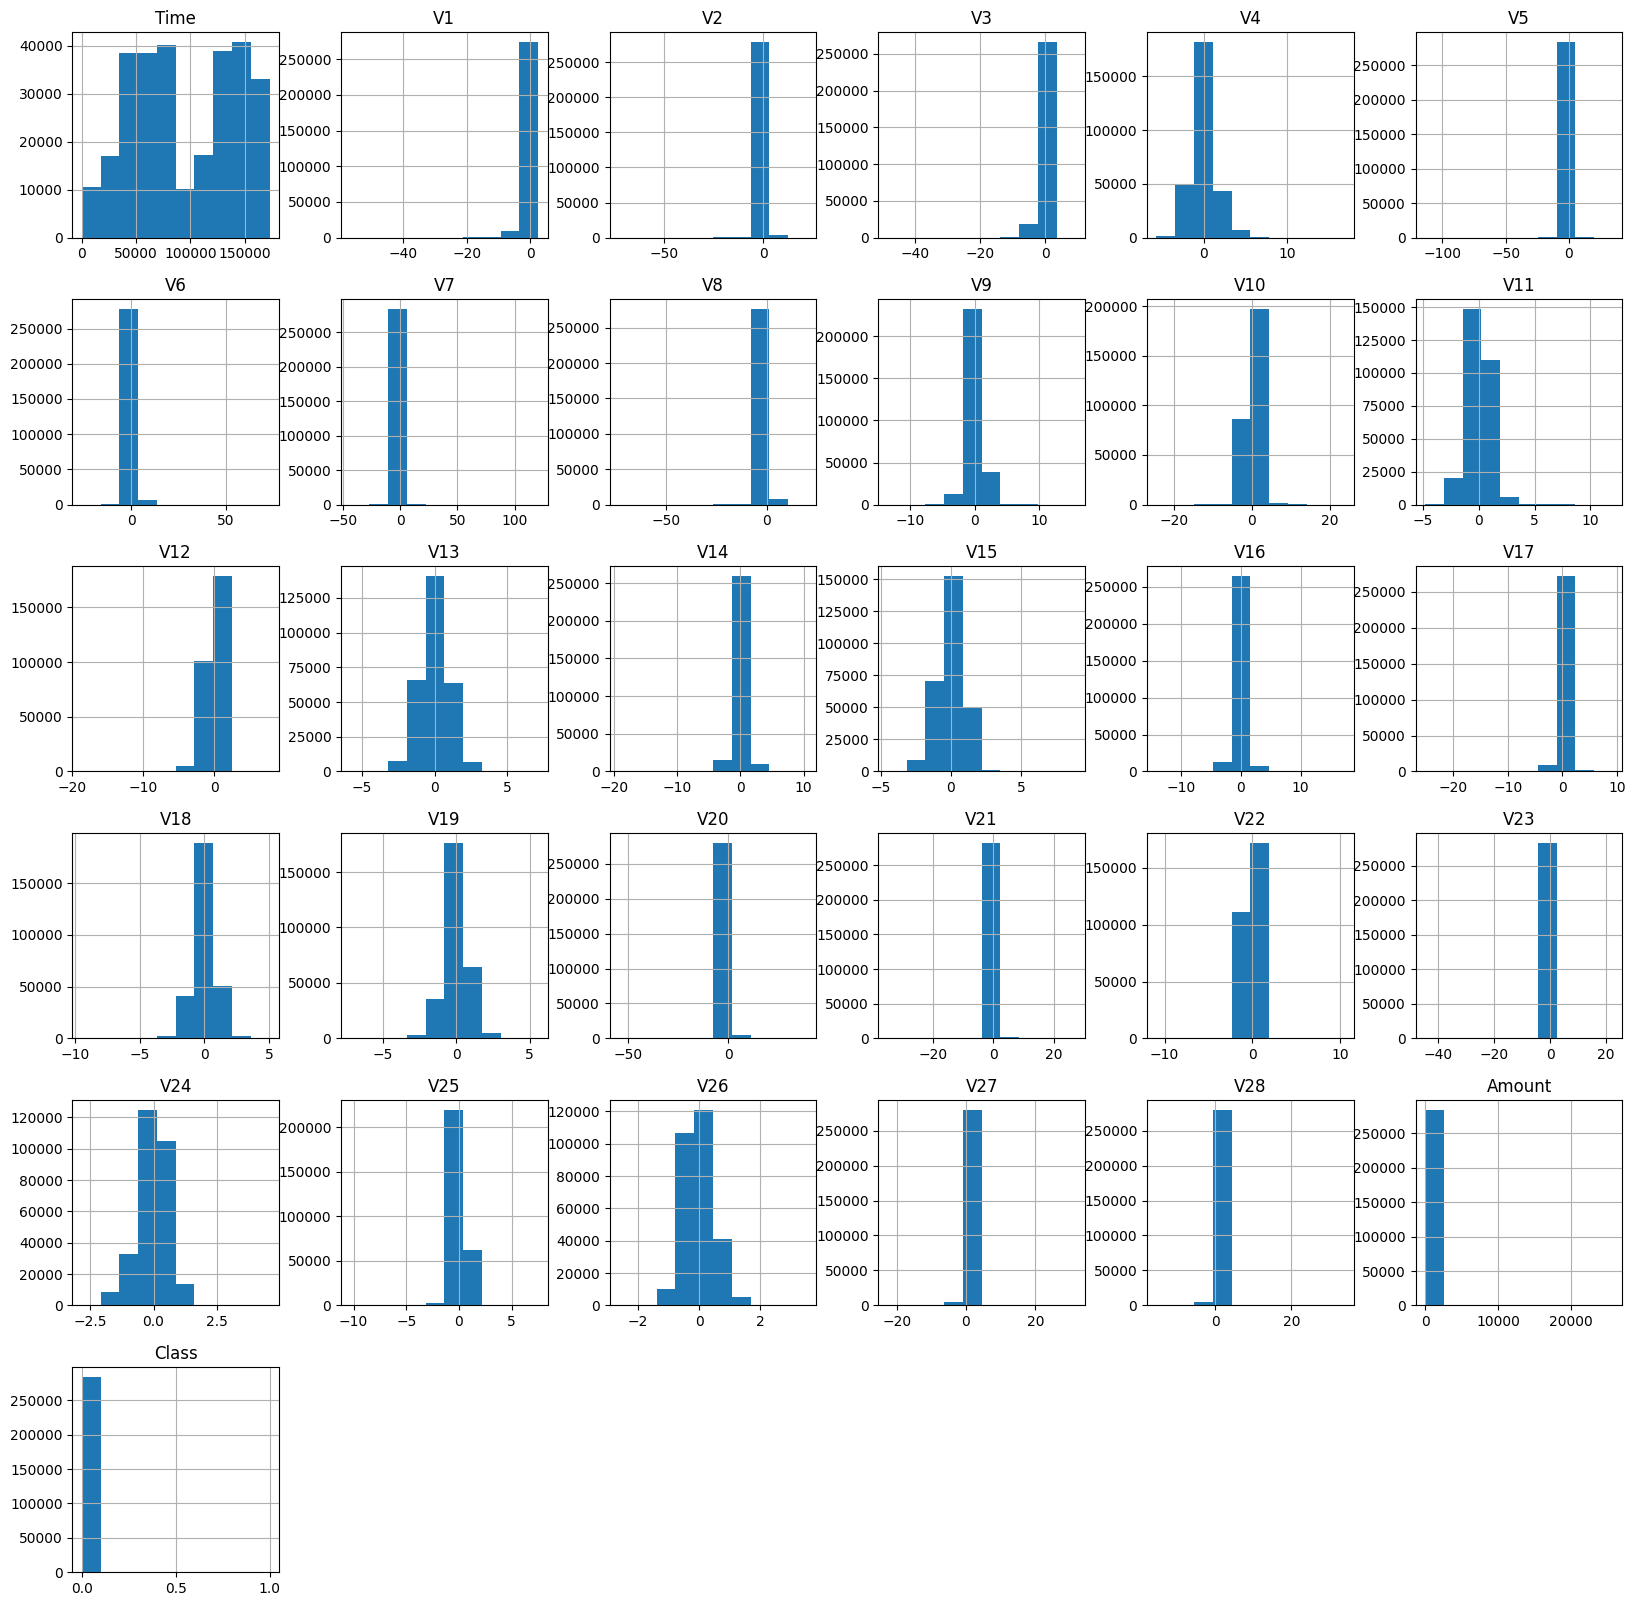

In [7]:
df.hist(figsize=(20, 20));

In [8]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlier_fraction = len(fraud) / float(len(valid))

print(outlier_fraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


In [9]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [10]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [11]:
import sys
import numpy as np
import matplotlib as mpl
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

<Axes: >

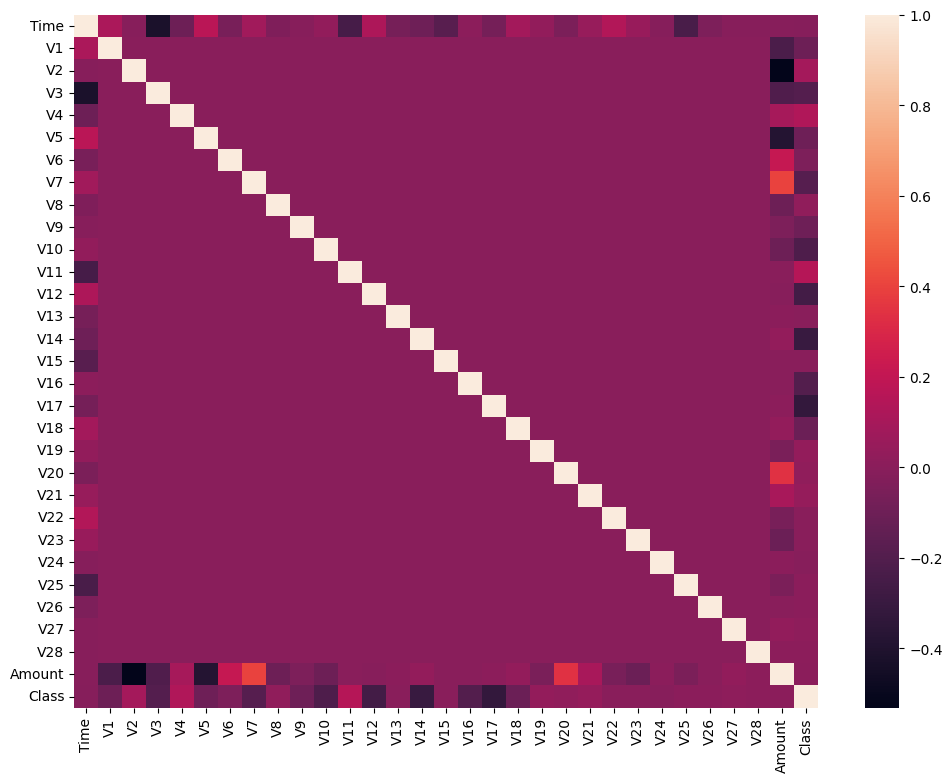

In [12]:
corrmat = df.corr()
fit = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat)

In [13]:
# Create Hour feature
df['Hour'] = (df['Time'] // 3600) % 24

# Log-transform Amount
df['Log_Amount'] = np.log1p(df['Amount'])

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

# Print the shape
print(X.shape)
print(y.shape)

(284807, 32)
(284807,)


In [15]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Hour,Log_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,4.262539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,23.0,0.570980
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,23.0,3.249987
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,23.0,4.232366
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,23.0,2.397895


In [16]:
XData = X.values
yData = y.values

In [17]:
XData

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.49620000e+02,  0.00000000e+00,  5.01476011e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         2.69000000e+00,  0.00000000e+00,  1.30562646e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
         3.78660000e+02,  0.00000000e+00,  5.93927612e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         6.78800000e+01,  2.30000000e+01,  4.23236586e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.00000000e+01,  2.30000000e+01,  2.39789527e+00],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         2.17000000e+02,  2.30000000e+01,  5.38449506e+00]])

**3. Split Train/Val/Test**

In [18]:
# X_train , X_test, y_train , y_test = train_test_split(X,y , random_state=42, test_size=0.2)

X_train , X_temp , y_train , y_temp = train_test_split(X,y , random_state=42, test_size=0.2)

X_val , X_test , y_val , y_test = train_test_split(X_temp,y_temp , random_state=42, test_size=0.2)

**4. Apply SMOTE on train only**

In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


**5. Train models (RF, XGB on X_train_res, y_train_res)**

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    n_estimators=50,
    max_depth=8,
    min_samples_split=20,
    n_jobs=-1,
    random_state=42
)

rfc.fit(X_train_res, y_train_res)
yPred = rfc.predict(X_test)

import xgboost as xgb
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    random_state=42,
    tree_method='hist'
)

model.fit(X_train_res, y_train_res)
preds = model.predict(X_test)


**6. Evaluate (on X_val and final X_test)**

📊 Model Evaluation Metrics
Accuracy            : 0.9975
Precision           : 0.3864
Recall              : 0.9444
F1 Score            : 0.5484
Matthews Corr Coef  : 0.6032
pr_auc              : 0.3650
Accuracy            : 0.9993
Precision           : 0.7778
Recall              : 0.7778
F1 Score            : 0.7778
Matthews Corr Coef  : 0.7774
pr_auc              : 0.6053


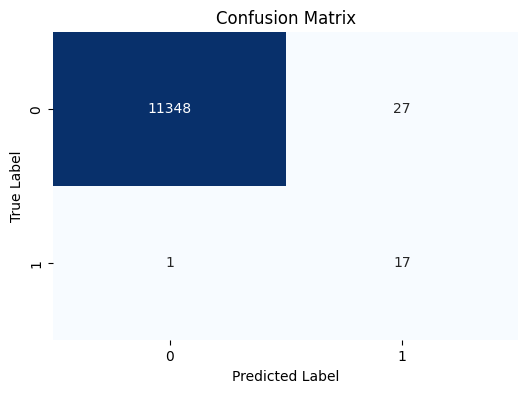

In [21]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef,
    confusion_matrix , average_precision_score
)

# Calculate metrics
metrics = {
    "Accuracy": accuracy_score(y_test, yPred),
    "Precision": precision_score(y_test, yPred),
    "Recall": recall_score(y_test, yPred),
    "F1 Score": f1_score(y_test, yPred),
    "Matthews Corr Coef": matthews_corrcoef(y_test, yPred),
    "pr_auc": average_precision_score(y_test, yPred)
}


metricsForXgBoost = {
    "Accuracy": accuracy_score(y_test, preds),
    "Precision": precision_score(y_test, preds),
    "Recall": recall_score(y_test, preds),
    "F1 Score": f1_score(y_test, preds),
    "Matthews Corr Coef": matthews_corrcoef(y_test, preds),
    "pr_auc": average_precision_score(y_test, preds)
}

# Print metrics nicely
print("📊 Model Evaluation Metrics")
for name, score in metrics.items():
    print(f"{name:20}: {score:.4f}")

for name, score in metricsForXgBoost.items():
    print(f"{name:20}: {score:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**7. Compare with anomaly detection (done)**

In [22]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

sample_size = 30000

X_sample = X.sample(sample_size, random_state=42)
y_sample = y.loc[X_sample.index]
outlier_fraction = len(y_sample[y_sample == 1]) / float(len(y_sample[y_sample == 0]))

classifiers = {
    'Isolation Forest': IsolationForest(
        max_samples=len(X_sample),
        contamination=outlier_fraction,
        random_state=random_state
    ),
    'Local Outlier Factor': LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction
    )
}

for clf_name, clf in classifiers.items():
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X_sample)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X_sample)
        y_pred = clf.predict(X_sample)
        scores_pred = clf.decision_function(X_sample)

    y_pred = np.where(y_pred == 1, 0, 1)  # convert to 0/1

    print(f"{clf_name} Results:")
    print("Accuracy:", accuracy_score(y_sample, y_pred))
    print(classification_report(y_sample, y_pred))


Isolation Forest: 643
0.9977423307713644
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.35      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



**8. Explainability with SHAP**

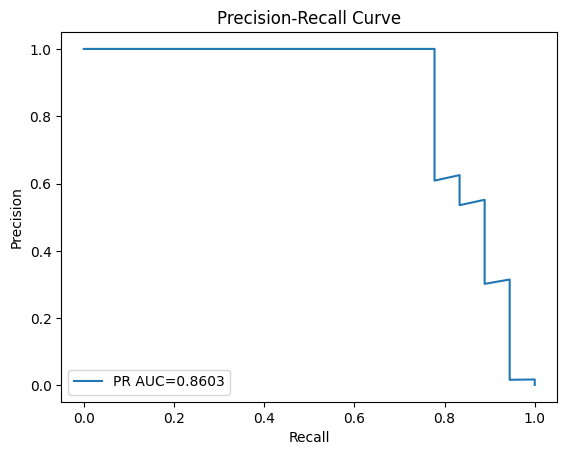

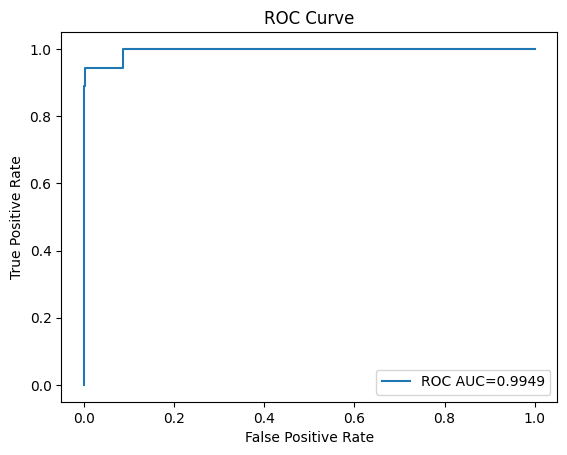

In [23]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_scores = model.predict_proba(X_test)[:,1]

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f'PR AUC={pr_auc:.4f}')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC AUC={roc_auc:.4f}')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**8A. Global SHAP summary**

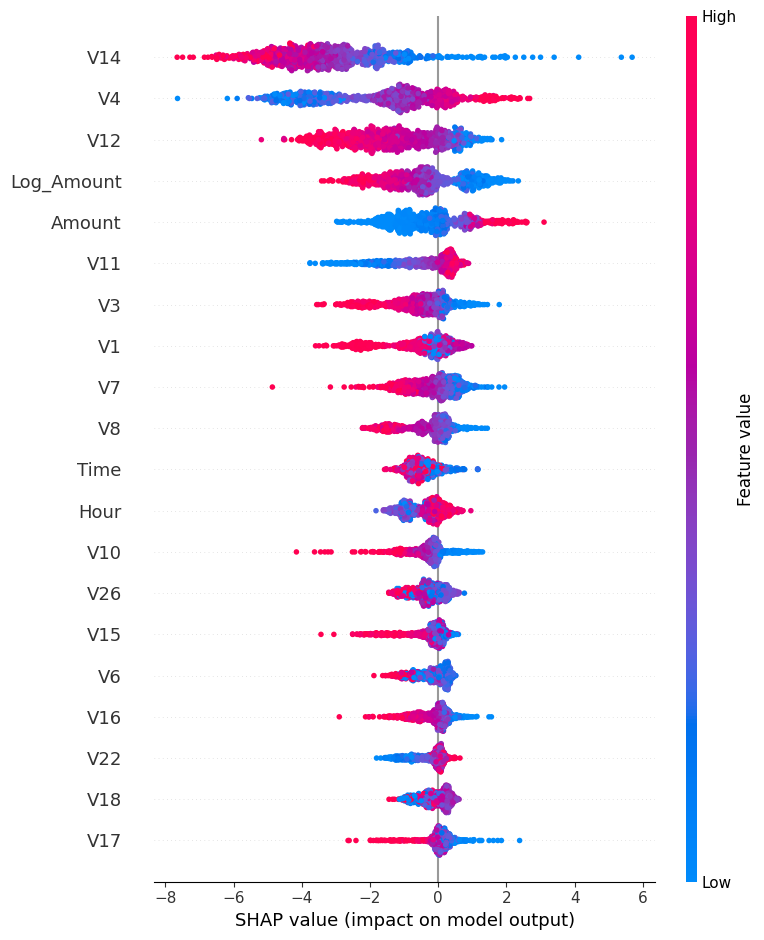

In [24]:
import shap

# explain model predictions using SHAP
explainer = shap.TreeExplainer(model)   # XGBoost model
X_sample = X_test.sample(1000, random_state=42)

shap_values = explainer.shap_values(X_sample)

# summary plot (shows top features driving fraud risk globally)
shap.summary_plot(shap_values, X_sample)

**8B. Local SHAP explanations (2 examples)**

In [25]:
# take a consistent sample of test data
X_sample = X_test.sample(1000, random_state=42)
y_sample = y_test.loc[X_sample.index]

shap_values = explainer.shap_values(X_sample)

# pick one fraud case
fraud_index = y_sample[y_sample == 1].sample(1, random_state=42).index[0]
shap.force_plot(
    explainer.expected_value,
    shap_values[X_sample.index.get_loc(fraud_index), :],
    X_sample.loc[fraud_index, :]
)
# pick one non-fraud case
valid_index = y_sample[y_sample == 0].sample(1, random_state=42).index[0]
shap.force_plot(
    explainer.expected_value,
    shap_values[X_sample.index.get_loc(valid_index), :],
    X_sample.loc[valid_index, :]
)

**8C. Threshold tuning for business metric**

In [26]:
from sklearn.metrics import precision_recall_curve

# predict fraud probabilities
y_scores = model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# find threshold for precision >= 0.90
target_precision = 0.90
idx = next(i for i, p in enumerate(precision) if p >= target_precision)
best_threshold = thresholds[idx]
print(f"Chosen threshold = {best_threshold:.4f}, Recall at this precision = {recall[idx]:.4f}")


Chosen threshold = 0.9973, Recall at this precision = 0.7778


**9. Save final model with joblib (done)**

In [27]:
import joblib
joblib.dump(model, "fraud_xgb_model.pkl")

['fraud_xgb_model.pkl']